### Fraud Score 2
---

Was the high missing ratio caused by Socure hot swap occurred last October?

2020/10/13 - would be great if we can look at production data then...

In [2]:
import sys, os, json, s3fs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_feather("../../data/combined_all_features/combined_1632358942.feather")
df = df[df.is_static]

<AxesSubplot:>

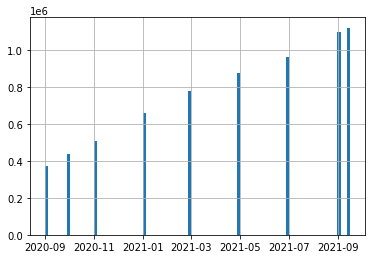

In [7]:
df.sample_date.hist(bins=100)

In [11]:
df_202009 = df[df.sample_date==pd.to_datetime("2020-09-01")]
df_202010 = df[df.sample_date==pd.to_datetime("2020-10-01")]

In [12]:
df_202009.shape, df_202010.shape

((370433, 91), (438552, 91))

In [13]:
df_202009.fraud_score_2.isna().value_counts()

False    354270
True      16163
Name: fraud_score_2, dtype: int64

In [14]:
df_202010.fraud_score_2.isna().value_counts()

False    419676
True      18876
Name: fraud_score_2, dtype: int64

In [20]:
df.groupby("sample_date")["fraud_score_2"].apply(lambda s: s.isna().mean()).to_frame()

,fraud_score_2
sample_date,
2020-09-01,0.043633
2020-10-01,0.043042
2020-11-01,0.031258
2021-01-01,0.023219
2021-03-01,0.016678
2021-05-01,0.127392
2021-07-01,0.226198
2021-09-01,0.346355
2021-09-15,0.367143


<AxesSubplot:>

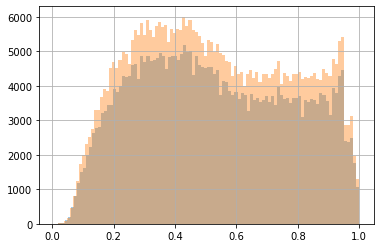

In [27]:
dt1 = "2020-09-01"
dt2 = "2020-10-01"
df1 = df[df.sample_date == pd.to_datetime(dt1)]
df2 = df[df.sample_date == pd.to_datetime(dt2)]
df1.fraud_score_2.hist(bins=100, alpha=0.4)
df2.fraud_score_2.hist(bins=100, alpha=0.4)

In [22]:
modeling_df = pd.read_parquet("s3://sofi-data-science/jxu/monitoring/customer-risk-v1/2021-06/modeling_df_2020-12-31_scored.parquet")

<AxesSubplot:>

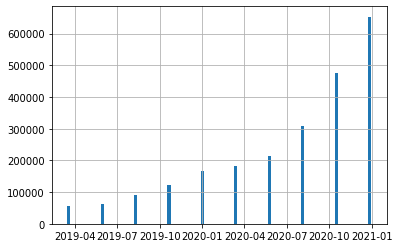

In [23]:
modeling_df[modeling_df.is_static].sample_date.hist(bins=100)

In [25]:
df_tmp = modeling_df[modeling_df.is_static]
df_tmp.groupby("sample_date")["fraud_score_2"].apply(lambda s: s.isna().mean()).to_frame()

,fraud_score_2
sample_date,
2019-03-15,0.577148
2019-05-27,0.465753
2019-08-08,0.314596
2019-10-20,0.246717
2020-01-01,0.135349
2020-03-14,0.102678
2020-05-26,0.075745
2020-08-07,0.062703
2020-10-19,0.031994


In [ ]:
# 